In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**4개 txt 데이터 간의 공통점을 추출하는 방법**

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.decomposition import LatentDirichletAllocation
from collections import Counter
from gensim.models import Word2Vec

In [ ]:
# Load text data from the four files
file_paths = ['/content/drive/MyDrive/four programming/C_data_Q_list.txt', '/content/drive/MyDrive/four programming/Prolog_data_Q_list.txt', '/content/drive/MyDrive/four programming/Python_data_Q_list.txt', '/content/drive/MyDrive/four programming/java_data_Q_list.txt']
text_data = []

for file_path in file_paths:
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()
        text_data.append(text)

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Tokenize the text data
tokenized_data = [word_tokenize(text.lower()) for text in text_data]

단어 빈도 분석: 각 텍스트 데이터 세트에서 각 단어의 빈도를 계산하고 4개 데이터 세트 모두에서 자주 나타나는 공통 단어를 식별

In [ ]:
# Method 1: Word Frequency Analysis
def word_frequency_analysis(tokenized_data):
    all_tokens = [token for sublist in tokenized_data for token in sublist]
    word_freq = nltk.FreqDist(all_tokens)
    common_words = word_freq.most_common()
    return common_words

common_words = word_frequency_analysis(tokenized_data)
print("Method 1: Word Frequency Analysis")
print(common_words)

Method 1: Word Frequency Analysis
[('to', 6054), ('a', 5360), ('in', 5193), ('?', 3454), ('the', 3246), ('i', 3186), ('how', 2915), ('of', 2619), ('prolog', 2103), ('.', 2010), ('and', 1910), ('with', 1830), ('(', 1675), (')', 1672), ('is', 1591), (',', 1507), ('from', 1407), ('using', 1320), ('list', 1301), ('not', 1172), ('c', 1163), ('for', 1156), (':', 1154), ('python', 1059), ('on', 1007), ('an', 923), ('java', 840), ('file', 804), ('can', 798), ('it', 696), ('error', 657), ('-', 649), ('my', 648), ('that', 636), ('when', 632), ('function', 625), ('am', 617), ('array', 610), ('have', 605), ('do', 591), ('code', 584), ('why', 554), ('does', 539), ('this', 528), ('get', 523), ('data', 495), ('trying', 463), ('string', 442), ('program', 441), ('value', 439), ("n't", 422), ('use', 418), ('if', 411), ("'", 402), ('by', 400), ('as', 391), ('``', 377), ("'m", 370), ("''", 360), ('or', 357), ('two', 357), ('into', 352), ('but', 350), ('number', 330), ('what', 329), ('spring', 326), ('valu

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')

# Define the set of stopwords
stop_words = set(stopwords.words('english'))

# Method 1: Word Frequency Analysis (Excluding Stopwords)
def word_frequency_analysis(tokenized_data):
    # Flatten the list of tokens
    all_tokens = [token for sublist in tokenized_data for token in sublist]

    # Filter out stopwords
    filtered_tokens = [word for word in all_tokens if word.lower() not in stop_words]

    # Calculate word frequency
    word_freq = nltk.FreqDist(filtered_tokens)

    # Get the most common words
    common_words = word_freq.most_common()

    return common_words

common_words = word_frequency_analysis(tokenized_data)
print("Method 1: Word Frequency Analysis (Excluding Stopwords)")
print(common_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Method 1: Word Frequency Analysis (Excluding Stopwords)
[('?', 3454), ('prolog', 2103), ('.', 2010), ('(', 1675), (')', 1672), (',', 1507), ('using', 1320), ('list', 1301), ('c', 1163), (':', 1154), ('python', 1059), ('java', 840), ('file', 804), ('error', 657), ('-', 649), ('function', 625), ('array', 610), ('code', 584), ('get', 523), ('data', 495), ('trying', 463), ('string', 442), ('program', 441), ('value', 439), ("n't", 422), ('use', 418), ("'", 402), ('``', 377), ("'m", 370), ("''", 360), ('two', 357), ('number', 330), ('spring', 326), ('values', 325), ('one', 302), ('find', 299), ('class', 295), ('variable', 284), ('[', 282), ('make', 281), ('create', 279), (']', 277), ('multiple', 266), ('way', 262), ('input', 257), ("'s", 254), ('working', 253), ('android', 250), ('without', 249), ('elements', 240), ('method', 240), ('pandas', 236), ('object', 234), ('predicate', 234), ('problem', 233), ('output', 232), ('type', 228), ('text', 228), ('different', 227), ('element', 225), ('lis

In [ ]:
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')

# Method to extract words from text data
def extract_words(tokenized_data):
    words = [word for sublist in tokenized_data for word in sublist if word.isalpha()]
    return words

# Call the method to extract words
words_list = extract_words(tokenized_data)

# Print the extracted words
print("Extracted Words:")
print(words_list)

Extracted Words:
['can', 'not', 'display', 'all', 'the', 'element', 'of', 'my', 'array', 'in', 'c', 'segmentation', 'fault', 'core', 'dumped', 'in', 'c', 'code', 'lumber', 'jack', 'question', 'using', 'domino', 'effect', 'to', 'maximize', 'the', 'profit', 'resize', 'image', 'without', 'using', 'how', 'to', 'uninstall', 'mingw', 'and', 'make', 'cygwin', 'as', 'deafult', 'make', 'program', 'with', 'gcc', 'how', 'to', 'uninstall', 'mingw', 'getting', 'exit', 'status', 'of', 'terminated', 'process', 'i', 'trying', 'to', 'get', 'the', 'exit', 'status', 'and', 'of', 'each', 'process', 'whether', 'it', 'returned', 'or', 'and', 'get', 'the', 'sum', 'of', 'each', 'number', 'of', 'and', 'number', 'of', 'specific', 'number', 'of', 'integers', 'my', 'requirement', 'is', 'to', 'print', 'x', 'numbers', 'of', 'prime', 'integer', 'so', 'my', 'code', 'starts', 'off', 'by', 'asking', 'user', 'to', 'input', 'a', 'number', 'i', 'want', 'it', 'to', 'produce', 'prime', 'numbers', 'how', 'it', 'calculate', '

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
import nltk
from nltk.util import ngrams

nltk.download('punkt')

# Method to extract 3-grams from text data
def extract_3grams(tokenized_data):
    n = 3  # Set the n-gram size to 3
    three_grams = list(ngrams([word for sublist in tokenized_data for word in sublist if word.isalpha()], n))
    return three_grams

# Call the method to extract 3-grams
three_grams_list = extract_3grams(tokenized_data)

# Print the extracted 3-grams
print("Extracted 3-grams:")
for three_gram in three_grams_list:
    print(three_gram)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
('number', 'of', 'semaphores')
('of', 'semaphores', 'how')
('semaphores', 'how', 'can')
('how', 'can', 'i')
('can', 'i', 'make')
('i', 'make', 'intellij')
('make', 'intellij', 'ce')
('intellij', 'ce', 'java')
('ce', 'java', 'syntax')
('java', 'syntax', 'highlighting')
('syntax', 'highlighting', 'more')
('highlighting', 'more', 'colorful')
('more', 'colorful', 'setting')
('colorful', 'setting', 'bleed')
('setting', 'bleed', 'and')
('bleed', 'and', 'slug')
('and', 'slug', 'for')
('slug', 'for', 'pdf')
('for', 'pdf', 'document')
('pdf', 'document', 'using')
('document', 'using', 'itext')
('using', 'itext', 'i')
('itext', 'i', 'am')
('i', 'am', 'using')
('am', 'using', 'itext')
('using', 'itext', 'version')
('itext', 'version', 'in')
('version', 'in', 'java')
('in', 'java', 'and')
('java', 'and', 'i')
('and', 'i', 'am')
('i', 'am', 'trying')
('am', 'trying', 'to')
('trying', 'to', 'set')
('to', 'set', 'bleed')
('set', 'bleed', 'and')
('bleed', 'and', 'sl

TF-IDF(용어 빈도-역 문서 빈도): TF-IDF는 문서 모음(이 경우 4개의 텍스트 데이터 세트)과 관련하여 문서 내 단어의 중요성을 반영하는 수치 통계

In [ ]:
# Method 2: TF-IDF (Term Frequency-Inverse Document Frequency)
def tfidf_analysis(text_data):
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_matrix = tfidf_vectorizer.fit_transform(text_data)
    cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
    return cosine_sim

cosine_similarity_matrix = tfidf_analysis(text_data)
print("\nMethod 2: TF-IDF Analysis")
print(cosine_similarity_matrix)


Method 2: TF-IDF Analysis
[[1.         0.42411065 0.87489267 0.87199154]
 [0.42411065 1.         0.40279596 0.38766203]
 [0.87489267 0.40279596 1.         0.83201344]
 [0.87199154 0.38766203 0.83201344 1.        ]]


단어 임베딩: Word2Vec, GloVe 또는 fastText와 같은 단어 임베딩 모델을 사용하여 단어를 밀집된 벡터로 표현, 그런 다음 4개의 데이터 세트에서 단어 벡터 간의 유사성을 계산하고 유사성 점수가 높은 일반적인 단어를 식별

In [ ]:
# Method 3: Text Clustering (K-means)
def text_clustering(text_data, num_clusters):
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_matrix = tfidf_vectorizer.fit_transform(text_data)
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(tfidf_matrix)
    cluster_labels = kmeans.labels_
    return cluster_labels

cluster_labels = text_clustering(text_data, num_clusters=2)
print("\nMethod 3: Text Clustering (K-means)")
print(cluster_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



Method 3: Text Clustering (K-means)
[0 1 0 0]


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import pandas as pd

# Method 3: Text Clustering (K-means)
def text_clustering(text_data, num_clusters):
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_matrix = tfidf_vectorizer.fit_transform(text_data)
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(tfidf_matrix)
    cluster_labels = kmeans.labels_
    return cluster_labels

cluster_labels = text_clustering(text_data, num_clusters=2)

# Create a DataFrame to display the cluster labels for each document
df = pd.DataFrame({'Document': text_data, 'Cluster': cluster_labels})

# Print the cluster labels
print("\nMethod 3: Text Clustering (K-means)")
print(df)


Method 3: Text Clustering (K-means)
                                            Document  Cluster
0  Cannot display all the element of my array in ...        0
1  What is the simple way to find the max length ...        1
2  My registration code returns incorrect even if...        0
3  My app is crashing after I clicked the call bu...        0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


주제 모델링: LDA(Latent Dirichlet Allocation) 또는 NMF(Non-Negative Matrix Factorization)와 같은 주제 모델링 기술을 적용하여 텍스트 데이터에 존재하는 공통 주제나 테마를 찾고, 동일한 주제와 관련된 단어와 문구는 공통점으로 간주

In [ ]:
# Method 4: Topic Modeling (Latent Dirichlet Allocation)
def topic_modeling(text_data, num_topics):
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_matrix = tfidf_vectorizer.fit_transform(text_data)
    lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
    lda.fit(tfidf_matrix)
    return lda.components_

topic_components = topic_modeling(text_data, num_topics=2)
print("\nMethod 4: Topic Modeling (Latent Dirichlet Allocation)")
print(topic_components)


Method 4: Topic Modeling (Latent Dirichlet Allocation)
[[0.50233602 0.50056687 0.50056687 ... 0.50059709 0.50091771 0.50056687]
 [0.50005792 0.50001359 0.50001359 ... 0.50001483 0.50002237 0.50001359]]


In [ ]:
import numpy as np
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

nltk.download('stopwords')
stop_words = stopwords.words('english')  # Use the list of stop words

# Additional phrase to exclude
exclude_phrase = "Stop Wars"

# Method 4: Topic Modeling (Latent Dirichlet Allocation) with Top Words (Excluding Stop Words and the exclude_phrase)
def display_topic_modeling(text_data, num_topics, num_top_words=10):
    # Define a custom stop words list that includes both common stop words and the exclude_phrase
    custom_stop_words = stop_words + [exclude_phrase]

    tfidf_vectorizer = TfidfVectorizer(stop_words=custom_stop_words)
    tfidf_matrix = tfidf_vectorizer.fit_transform(text_data)

    # Fit the LDA model
    lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
    lda.fit(tfidf_matrix)

    feature_names = np.array(tfidf_vectorizer.get_feature_names_out())

    for topic_idx, topic in enumerate(lda.components_):
        top_words_idx = topic.argsort()[:-num_top_words - 1:-1]

        # Filter top_words to exclude only the specified phrase
        top_words = [
            word for word in feature_names[top_words_idx]
            if word != exclude_phrase
        ]
        print(f"Topic {topic_idx + 1}: {', '.join(top_words)}")

# Define the number of topics and number of top words to display
num_topics = 5
num_top_words = 30

print("\nMethod 4: Topic Modeling (Latent Dirichlet Allocation) with Top Words (Excluding Stop Words and 'Stop Wars')")
display_topic_modeling(text_data, num_topics, num_top_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



Method 4: Topic Modeling (Latent Dirichlet Allocation) with Top Words (Excluding Stop Words and 'Stop Wars')
Topic 1: prolog, swi, predicate, lists, facts, dcg, predicates, rule, clp, recursion, elements, unification, rules, recursive, solutions, true, puzzle, atoms, tree, findall, logic, procedure, sicstus, pyswip, clauses, finding, operator, false, sum, query
Topic 2: swi, predicate, lists, prolog, facts, dcg, predicates, elements, recursion, rule, clp, recursive, tree, query, sum, true, finding, rules, unification, element, solutions, operator, logic, numbers, given, false, puzzle, graph, first, findall
Topic 3: swi, predicate, lists, prolog, facts, dcg, predicates, elements, recursion, rule, clp, recursive, tree, query, sum, true, finding, rules, unification, element, solutions, operator, logic, numbers, given, false, puzzle, graph, first, findall
Topic 4: using, python, java, file, list, array, function, spring, error, code, data, get, trying, string, pandas, program, value, use,

집합 연산: 각 데이터 집합을 단어 또는 구문 집합으로 처리하고 집합 연산(합집합, 교집합, 차이)을 사용하여 집합 전체에서 공통 요소 탐색, 4개의 데이터 모두 교차점은 공통 단어로 출력

In [ ]:
# Method 5: Set Operations
def common_words_set_operations(tokenized_data):
    common_words = set(tokenized_data[0])
    for tokens in tokenized_data[1:]:
        common_words.intersection_update(tokens)
    return common_words

common_words_set = common_words_set_operations(tokenized_data)
print("\nMethod 5: Set Operations")
print(common_words_set)


Method 5: Set Operations
{'float', 'project', 'extension', 'always', 'k', 'char', '7', 'parts', 'non', 'also', 'strange', 'doesnt', 'users', 'end', 'lowest', 'model', 'information', 'test', 'function', 'distance', 'exit', 'expected', 'above', 'searching', 'than', 'inserting', 'multiply', 'elements', 'optimize', 'present', 'located', 'creating', 'm', 'zero', 'others', 'right', 'missing', 'manage', 'user', 'javascript', 'exporting', 'p', 'e', '10', 'instantiate', 'normal', 'instructions', 'trying', 'contain', 'shows', 'vs', 'correct', 'version', 'their', '1st', 'much', 'system', 'root', 'compatible', 'help', 'caching', 'bits', 'replace', 'dependent', 'generic', 'connected', 'number', 'web', 'incorrect', 'numbers', 'from', 'application', 'display', 'fast', 'aggregate', 'correctly', '>', 'browser', 'argument', 'really', 'implementing', 'sign', 'parameters', 'shifting', 'displaying', 'studio', 'inheritance', 'defining', 'union', 'back', 'import', 'draw', 'rather', 'continue', 'listing', 's

코사인 유사성: TF-IDF 벡터 또는 각 데이터 세트의 단어 임베딩 간의 코사인 유사성을 계산, 유사성이 높은 단어나 문구는 공통된 것으로 간주

In [ ]:
# Method 6: Cosine Similarity on Word Embeddings (Word2Vec)
word2vec_model = Word2Vec(tokenized_data, vector_size=100, window=5, min_count=1, sg=0)
word_vectors = word2vec_model.wv

def word_embedding_similarity(word_vectors):
    common_words = []
    for word in word_vectors.key_to_index:
        if all(word in tokens for tokens in tokenized_data):
            common_words.append(word)
    return common_words

common_words_word2vec = word_embedding_similarity(word_vectors)
print("\nMethod 6: Cosine Similarity on Word Embeddings (Word2Vec)")
print(common_words_word2vec)


Method 6: Cosine Similarity on Word Embeddings (Word2Vec)
['to', 'a', 'in', '?', 'the', 'i', 'how', 'of', '.', 'and', 'with', '(', ')', 'is', ',', 'from', 'using', 'list', 'not', 'c', 'for', ':', 'python', 'on', 'an', 'java', 'file', 'can', 'it', 'error', '-', 'my', 'that', 'when', 'function', 'am', 'array', 'have', 'do', 'code', 'why', 'does', 'this', 'get', 'data', 'trying', 'string', 'program', 'value', "n't", 'use', 'if', "'", 'by', 'as', '``', "'m", "''", 'or', 'two', 'into', 'but', 'number', 'what', 'values', 'all', 'one', 'find', 'class', 'variable', '[', 'make', 'there', 'create', ']', 'are', 'multiple', 'way', 'input', 'which', "'s", 'working', 'without', 'method', 'elements', 'while', 'after', 'object', 'problem', 'output', 'text', 'type', 'different', 'element', 'lists', 'be', 'new', 'only', 'getting', 'same', 'loop', 'write', 'exception', 'user', 'set', 'read', 'check', 'time', 'want', 'some', 'numbers', 'add', 'project', 'work', 'run', 'another', 'api', 'convert', 'betwee

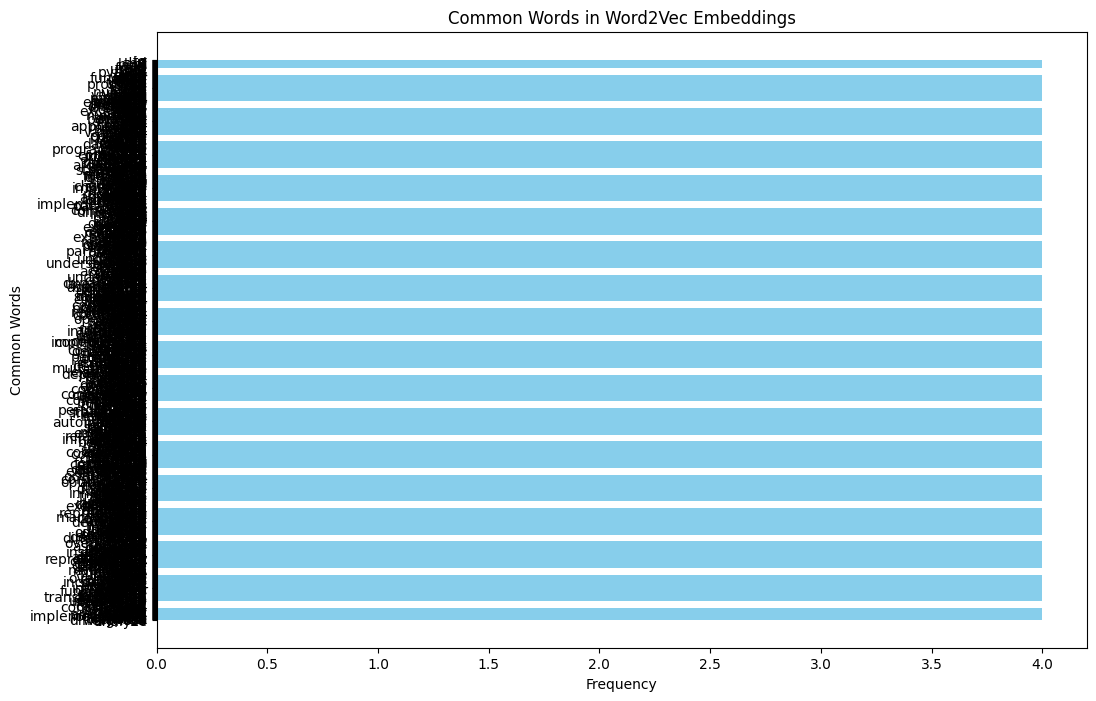

In [ ]:
import matplotlib.pyplot as plt

# Method 6: Cosine Similarity on Word Embeddings (Word2Vec)
word2vec_model = Word2Vec(tokenized_data, vector_size=100, window=5, min_count=1, sg=0)
word_vectors = word2vec_model.wv

def word_embedding_similarity(word_vectors):
    common_words = []
    for word in word_vectors.key_to_index:
        if all(word in tokens for tokens in tokenized_data):
            common_words.append(word)
    return common_words

common_words_word2vec = word_embedding_similarity(word_vectors)

# Count the frequency of common words
common_word_freq = {word: sum(1 for tokens in tokenized_data if word in tokens) for word in common_words_word2vec}

# Sort words by frequency
sorted_common_words = sorted(common_word_freq.items(), key=lambda x: x[1], reverse=True)

# Extract the words and their frequencies
common_words, common_freq = zip(*sorted_common_words)

# Create a bar chart to display the common words and their frequencies
plt.figure(figsize=(12, 8))
plt.barh(common_words, common_freq, color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Common Words')
plt.title('Common Words in Word2Vec Embeddings')
plt.gca().invert_yaxis()  # Invert the y-axis to display the most common word at the top
plt.show()

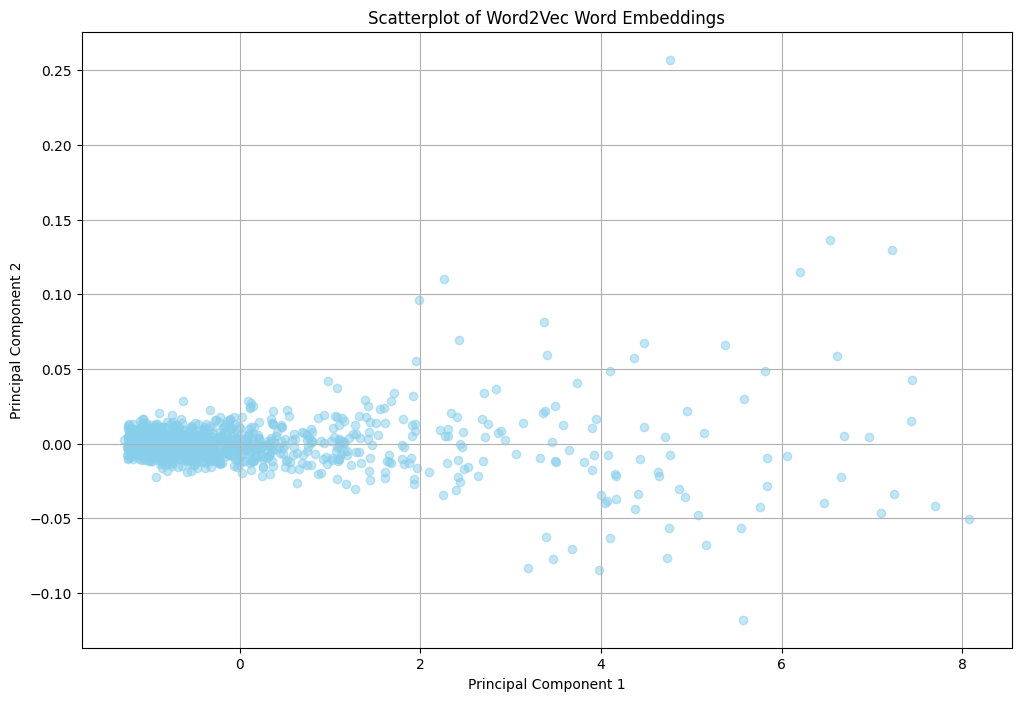

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Method 6: Cosine Similarity on Word Embeddings (Word2Vec)
word2vec_model = Word2Vec(tokenized_data, vector_size=100, window=5, min_count=1, sg=0)
word_vectors = word2vec_model.wv

def word_embedding_similarity(word_vectors):
    common_words = []
    for word in word_vectors.key_to_index:
        if all(word in tokens for tokens in tokenized_data):
            common_words.append(word)
    return common_words

common_words_word2vec = word_embedding_similarity(word_vectors)

# Get the word vectors for common words
word_vectors_common = [word_vectors[word] for word in common_words_word2vec]

# Reduce dimensionality for visualization (e.g., using PCA)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
word_vectors_pca = pca.fit_transform(word_vectors_common)

# Create a scatterplot to visualize the word embeddings
plt.figure(figsize=(12, 8))
plt.scatter(word_vectors_pca[:, 0], word_vectors_pca[:, 1], marker='o', color='skyblue', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatterplot of Word2Vec Word Embeddings')
plt.grid(True)
plt.show()

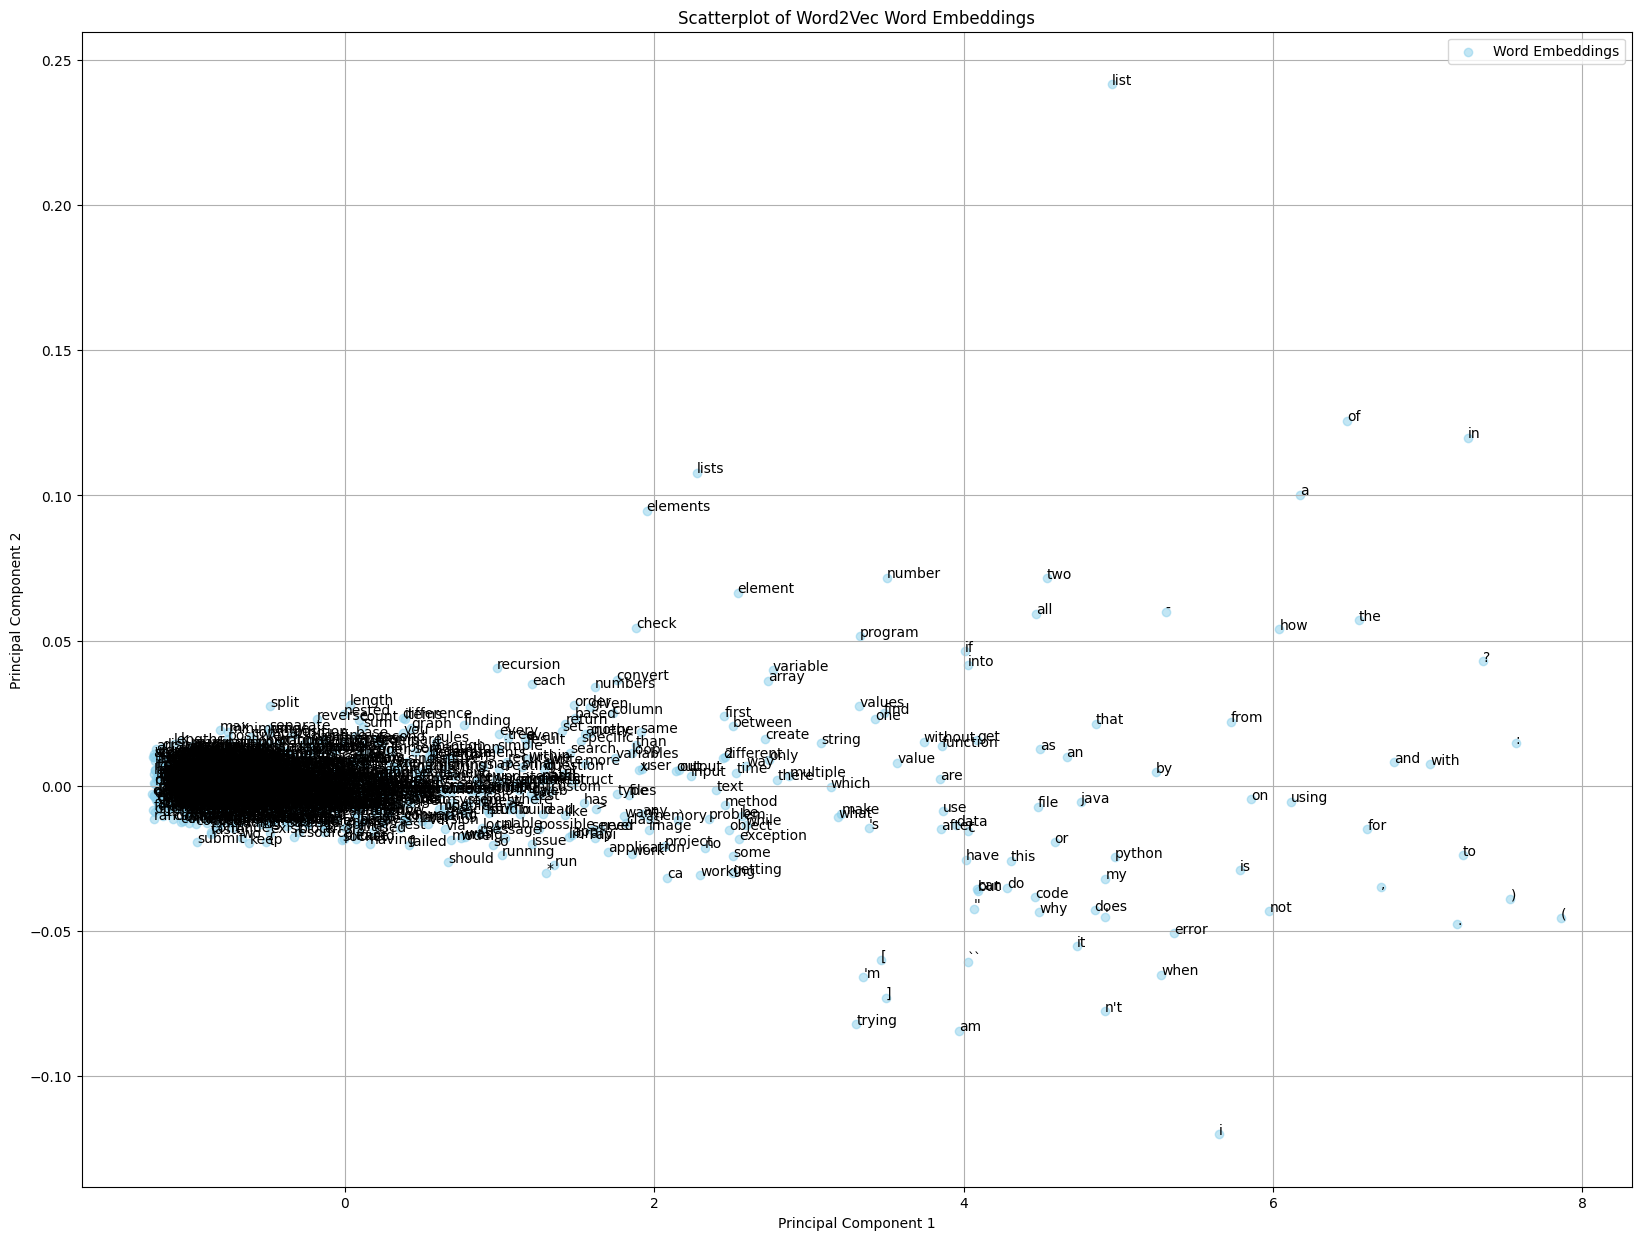

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Method 6: Cosine Similarity on Word Embeddings (Word2Vec)
word2vec_model = Word2Vec(tokenized_data, vector_size=100, window=5, min_count=1, sg=0)
word_vectors = word2vec_model.wv

def word_embedding_similarity(word_vectors):
    common_words = []
    for word in word_vectors.key_to_index:
        if all(word in tokens for tokens in tokenized_data):
            common_words.append(word)
    return common_words

common_words_word2vec = word_embedding_similarity(word_vectors)

# Get the word vectors for common words
word_vectors_common = [word_vectors[word] for word in common_words_word2vec]

# Reduce dimensionality for visualization (e.g., using PCA)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
word_vectors_pca = pca.fit_transform(word_vectors_common)

# Create a scatterplot to visualize the word embeddings
#plt.figure(figsize=(12, 8))
plt.figure(figsize=(20, 15))
plt.scatter(word_vectors_pca[:, 0], word_vectors_pca[:, 1], marker='o', color='skyblue', alpha=0.5, label='Word Embeddings')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatterplot of Word2Vec Word Embeddings')
plt.grid(True)

# Add legend
plt.legend(loc='best')

# Add labels to data points
for i, word in enumerate(common_words_word2vec):
    plt.annotate(word, (word_vectors_pca[i, 0], word_vectors_pca[i, 1]), fontsize=10)

plt.show()

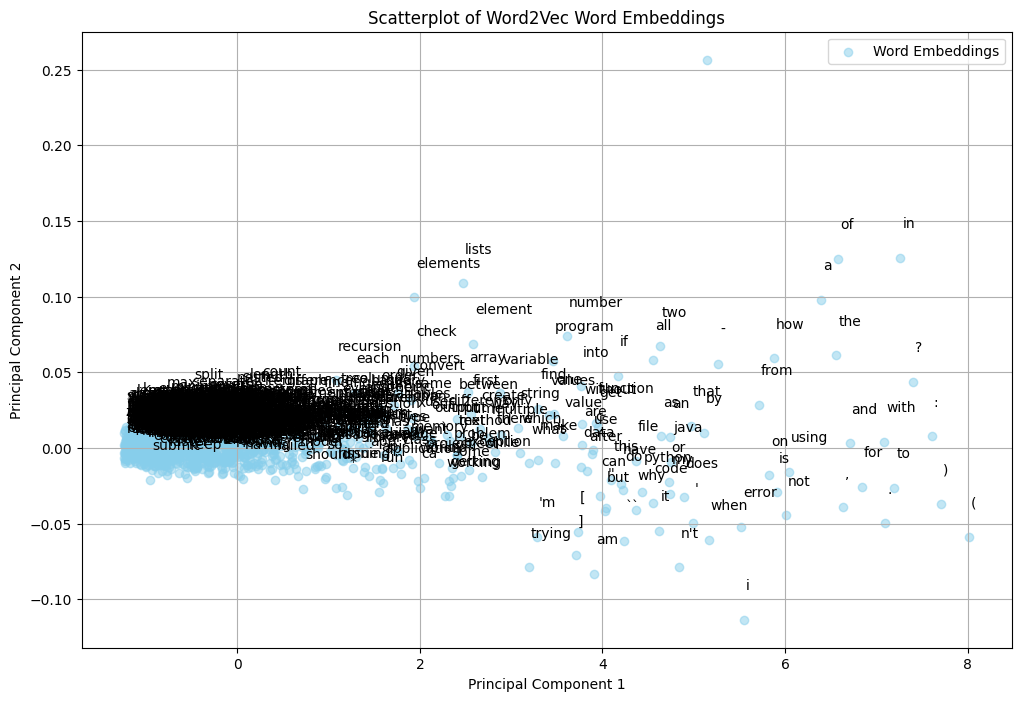

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Method 6: Cosine Similarity on Word Embeddings (Word2Vec)
word2vec_model = Word2Vec(tokenized_data, vector_size=100, window=5, min_count=1, sg=0)
word_vectors = word2vec_model.wv

def word_embedding_similarity(word_vectors):
    common_words = []
    for word in word_vectors.key_to_index:
        if all(word in tokens for tokens in tokenized_data):
            common_words.append(word)
    return common_words

common_words_word2vec = word_embedding_similarity(word_vectors)

# Get the word vectors for common words
word_vectors_common = [word_vectors[word] for word in common_words_word2vec]

# Reduce dimensionality for visualization (e.g., using PCA)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
word_vectors_pca = pca.fit_transform(word_vectors_common)

# Create a scatterplot to visualize the word embeddings
plt.figure(figsize=(12, 8))
plt.scatter(word_vectors_pca[:, 0], word_vectors_pca[:, 1], marker='o', color='skyblue', alpha=0.5, label='Word Embeddings')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatterplot of Word2Vec Word Embeddings')
plt.grid(True)

# Add legend
plt.legend(loc='best')

# Add labels to data points with padding for better visibility
label_padding = 0.02  # Adjust this value as needed
for i, word in enumerate(common_words_word2vec):
    x, y = word_vectors_pca[i, 0], word_vectors_pca[i, 1]
    plt.annotate(word, (x + label_padding, y + label_padding), fontsize=10)

plt.show()

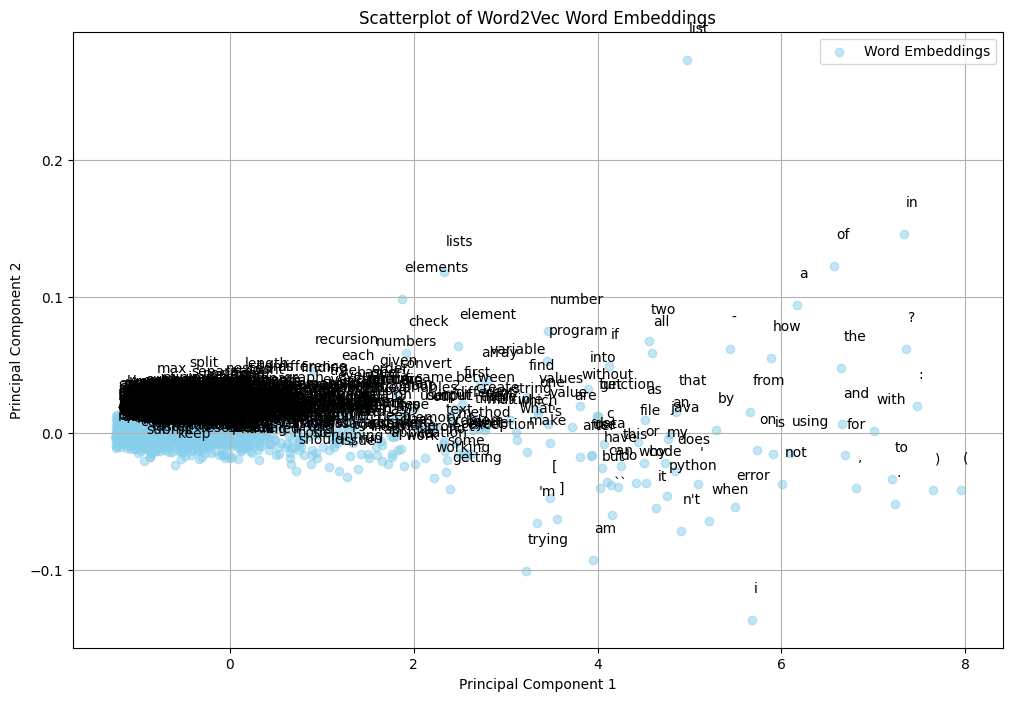

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Method 6: Cosine Similarity on Word Embeddings (Word2Vec)
word2vec_model = Word2Vec(tokenized_data, vector_size=100, window=5, min_count=1, sg=0)
word_vectors = word2vec_model.wv

def word_embedding_similarity(word_vectors):
    common_words = []
    for word in word_vectors.key_to_index:
        if all(word in tokens for tokens in tokenized_data):
            common_words.append(word)
    return common_words

common_words_word2vec = word_embedding_similarity(word_vectors)

# Get the word vectors for common words
word_vectors_common = [word_vectors[word] for word in common_words_word2vec]

# Reduce dimensionality for visualization (e.g., using PCA)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
word_vectors_pca = pca.fit_transform(word_vectors_common)

# Create a scatterplot to visualize the word embeddings
plt.figure(figsize=(12, 8))
plt.scatter(word_vectors_pca[:, 0], word_vectors_pca[:, 1], marker='o', color='skyblue', alpha=0.5, label='Word Embeddings')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatterplot of Word2Vec Word Embeddings')
plt.grid(True)

# Add legend
plt.legend(loc='best')

# Add labels to data points with padding for better visibility
label_padding_x = 0.02  # Adjust this value as needed for x-axis
label_padding_y = 0.02  # Adjust this value as needed for y-axis
for i, word in enumerate(common_words_word2vec):
    x, y = word_vectors_pca[i, 0], word_vectors_pca[i, 1]
    plt.annotate(word, (x + label_padding_x, y + label_padding_y), fontsize=10)

plt.show()

N-그램: n-그램(n 단어의 시퀀스)을 분석하여 텍스트 데이터 전체에 나타나는 공통 문구 또는 시퀀스 찾고, n-그램의 빈도를 계산하고 비교하여 수행

In [ ]:
# Method 7: N-grams
def common_ngrams(tokenized_data, n):
    ngram_lists = [list(nltk.ngrams(tokens, n)) for tokens in tokenized_data]
    common_ngrams = set(ngram_lists[0])
    for ngrams in ngram_lists[1:]:
        common_ngrams.intersection_update(ngrams)
    return common_ngrams

common_ngrams_set = common_ngrams(tokenized_data, n=2)
print("\nMethod 7: Common N-grams")
print(common_ngrams_set)


Method 7: Common N-grams
{('program', 'to'), ('to', 'use'), (')', 'for'), ('the', 'original'), ('of', 'all'), ('table', 'using'), ('having', 'trouble'), ('a', 'single'), ('database', 'in'), ('variable', 'to'), ("'", 'and'), ('permission', 'denied'), ('able', 'to'), ('to', 'perform'), ('following', 'a'), ('?', 'sorting'), ('i', 'get'), ('statement', '?'), ('only', 'in'), ('from', 'another'), ('error', 'on'), ('usage', 'of'), ('with', 'a'), ('the', 'answer'), ('to', 'determine'), ('is', "n't"), ('it', "'s"), ('an', 'integer'), ('the', 'input'), ('to', 'merge'), ('get', 'a'), ('does', 'it'), ('object', 'from'), ('of', 'code'), ('in', 'same'), ('i', 'wrote'), ('increase', 'the'), ('a', 'c'), ('way', '?'), ('the', 'index'), ('between', 'a'), ('a', 'part'), ('of', 'each'), ('do', 'it'), ('it', 'always'), (',', 'what'), ('in', 'two'), ('store', 'the'), ('[', '1'), ('text', 'file'), ('to', 'move'), ('a', 'date'), ('i', 'print'), ('only', 'one'), ('is', 'empty'), (',', 'which'), ('the', 'data'

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.decomposition import LatentDirichletAllocation

단어 구름: 각 텍스트 데이터 세트에 대한 단어 구름을 만들고 시각적으로 비교, 모든 단어 구름에 눈에 띄게 나타나는 일반적인 단어는 공통된 특징일 가능성이 높음

In [ ]:
#Method 8: Create Word Clouds
def create_word_clouds(tokenized_data):
    word_clouds = [WordCloud(width=800, height=400).generate(' '.join(tokens)) for tokens in tokenized_data]
    return word_clouds

word_clouds = create_word_clouds(tokenized_data)
print("Method 8: Word Clouds")
for i, word_cloud in enumerate(word_clouds):
    word_cloud.to_file(f"word_cloud_{i + 1}.png")
    print(f"Word Cloud {i + 1} saved as word_cloud_{i + 1}.png")

Method 8: Word Clouds
Word Cloud 1 saved as word_cloud_1.png
Word Cloud 2 saved as word_cloud_2.png
Word Cloud 3 saved as word_cloud_3.png
Word Cloud 4 saved as word_cloud_4.png


Method 8: Word Clouds


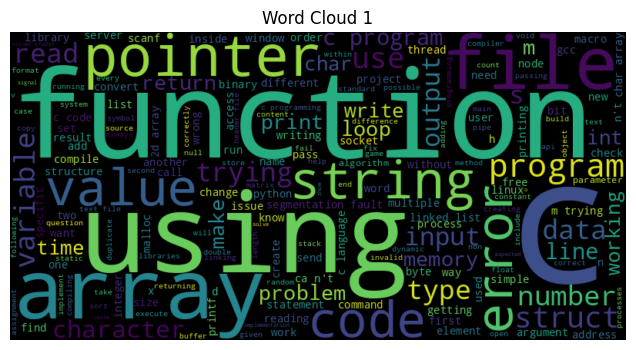

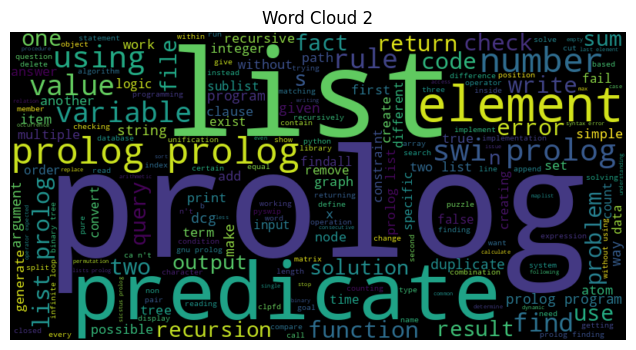

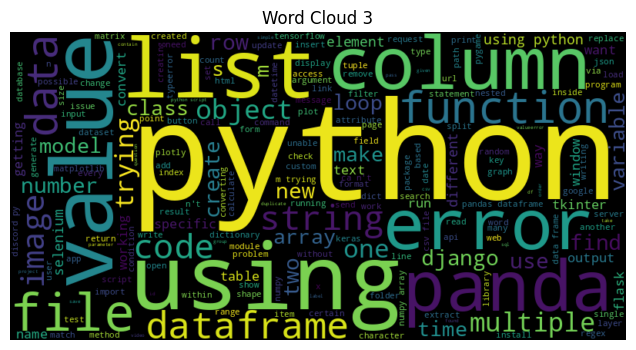

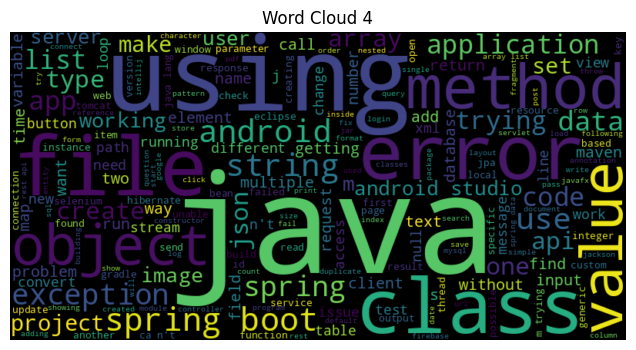

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Method 8: Create and Display Word Clouds
def display_word_clouds(tokenized_data):
    word_clouds = [WordCloud(width=800, height=400).generate(' '.join(tokens)) for tokens in tokenized_data]
    return word_clouds

word_clouds = display_word_clouds(tokenized_data)
print("Method 8: Word Clouds")
for i, word_cloud in enumerate(word_clouds):
    plt.figure(figsize=(8, 4))
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud {i + 1}")
    plt.show()

의미 분석: 사전 훈련된 단어 임베딩(예: Word2Vec, GloVe)을 활용하여 단어나 구문 간의 의미 유사성을 측정, 텍스트 전체에서 유사한 단어 벡터를 찾아 공통점을 식별

In [ ]:
# Method 9: Semantic Analysis (Cosine Similarity on TF-IDF)
def tfidf_analysis(text_data):
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_matrix = tfidf_vectorizer.fit_transform(text_data)
    cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
    return cosine_sim

cosine_similarity_matrix = tfidf_analysis(text_data)
print("\nMethod 9: TF-IDF Analysis")
print(cosine_similarity_matrix)


Method 9: TF-IDF Analysis
[[1.         0.42411065 0.87489267 0.87199154]
 [0.42411065 1.         0.40279596 0.38766203]
 [0.87489267 0.40279596 1.         0.83201344]
 [0.87199154 0.38766203 0.83201344 1.        ]]


In [ ]:
# Method 10: Text Clustering (K-means)
def text_clustering(text_data, num_clusters):
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_matrix = tfidf_vectorizer.fit_transform(text_data)
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(tfidf_matrix)
    cluster_labels = kmeans.labels_
    return cluster_labels

cluster_labels = text_clustering(text_data, num_clusters=2)
print("\nMethod 10: Text Clustering (K-means)")
print(cluster_labels)



Method 10: Text Clustering (K-means)
[0 1 0 0]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


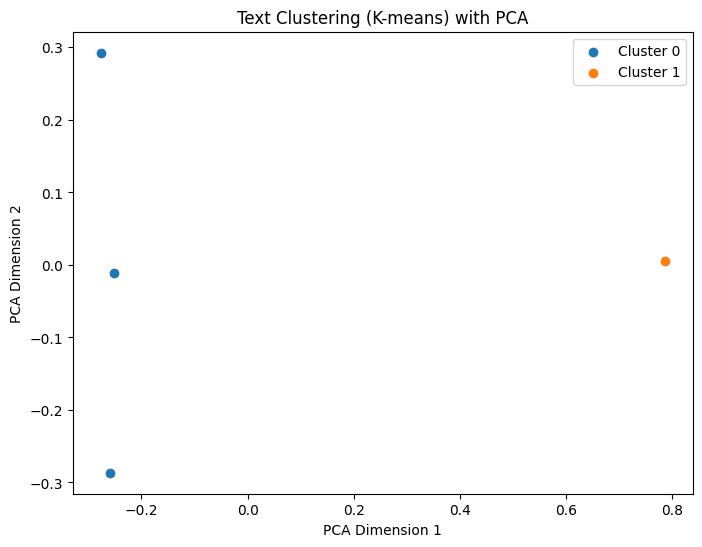

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd

# Method 10: Text Clustering (K-means) with PCA for Visualization
def display_text_clustering_with_pca(text_data, num_clusters):
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_matrix = tfidf_vectorizer.fit_transform(text_data)

    # Apply PCA for dimensionality reduction
    pca = PCA(n_components=2)  # Reduce to 2 dimensions for plotting
    tfidf_matrix_pca = pca.fit_transform(tfidf_matrix.toarray())

    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(tfidf_matrix_pca)
    cluster_labels = kmeans.labels_

    return cluster_labels, tfidf_matrix_pca

# Define the number of clusters
num_clusters = 2

cluster_labels, tfidf_matrix_pca = display_text_clustering_with_pca(text_data, num_clusters)

# Create a DataFrame for visualization
df = pd.DataFrame({'Cluster': cluster_labels, 'PCA1': tfidf_matrix_pca[:, 0], 'PCA2': tfidf_matrix_pca[:, 1]})

# Plot clusters
plt.figure(figsize=(8, 6))
for cluster in range(num_clusters):
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f'Cluster {cluster}')

plt.xlabel('PCA Dimension 1')
plt.ylabel('PCA Dimension 2')
plt.title('Text Clustering (K-means) with PCA')
plt.legend()
plt.show()

In [ ]:
# Method 11: Topic Modeling (Latent Dirichlet Allocation)
def topic_modeling(text_data, num_topics):
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_matrix = tfidf_vectorizer.fit_transform(text_data)
    lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
    lda.fit(tfidf_matrix)
    return lda.components_

topic_components = topic_modeling(text_data, num_topics=2)
print("\nMethod 11: Topic Modeling (Latent Dirichlet Allocation)")
print(topic_components)


Method 11: Topic Modeling (Latent Dirichlet Allocation)
[[0.50233602 0.50056687 0.50056687 ... 0.50059709 0.50091771 0.50056687]
 [0.50005792 0.50001359 0.50001359 ... 0.50001483 0.50002237 0.50001359]]


감정 분석: 각 텍스트의 감정을 분석하고 공통된 감정 패턴이나 모든 텍스트에 표현된 감정을 식별

In [ ]:
# Method 13: Sentiment Analysis (VADER)
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

def perform_sentiment_analysis(text_data):
    sia = SentimentIntensityAnalyzer()
    sentiments = [sia.polarity_scores(text) for text in text_data]
    return sentiments

sentiments = perform_sentiment_analysis(text_data)
print("\nMethod 13: Sentiment Analysis (VADER)")
for i, sentiment in enumerate(sentiments):
    print(f"Sentiment in Document {i + 1}:")
    print(sentiment)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...



Method 13: Sentiment Analysis (VADER)
Sentiment in Document 1:
{'neg': 0.076, 'neu': 0.854, 'pos': 0.07, 'compound': -0.9999}
Sentiment in Document 2:
{'neg': 0.057, 'neu': 0.866, 'pos': 0.077, 'compound': 0.9999}
Sentiment in Document 3:
{'neg': 0.055, 'neu': 0.863, 'pos': 0.082, 'compound': 1.0}
Sentiment in Document 4:
{'neg': 0.064, 'neu': 0.867, 'pos': 0.069, 'compound': 0.9437}


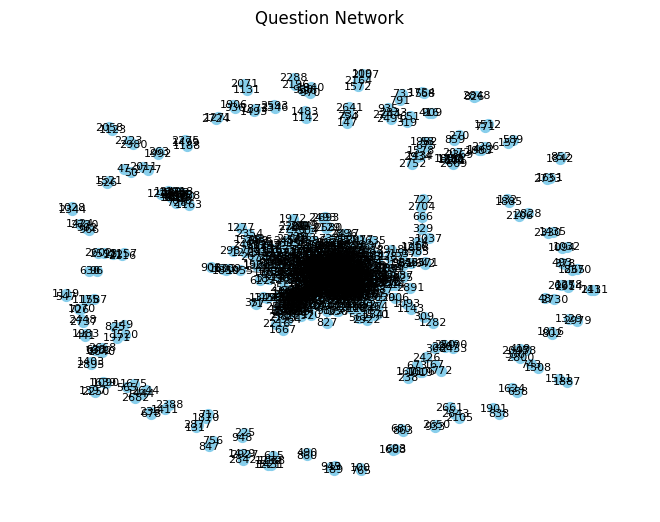

In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# 텍스트 파일 경로
text_file_path = '/content/drive/MyDrive/four programming/Python_data_Q_list.txt'  # 실제 파일 경로로 수정

# 텍스트 파일 읽어오기
df = pd.read_table(text_file_path, header=None, names=['Question'])

# 'Question' 열에서 NaN 값을 빈 문자열로 대체
df['Question'] = df['Question'].fillna('')

# TF-IDF로 키워드 추출
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['Question'])
cosine_sim = cosine_similarity(X, X)

# 유사도 행렬에서 연결 정보 추출
edges = []
for i in range(len(cosine_sim)):
    for j in range(i + 1, len(cosine_sim[i])):
        if cosine_sim[i][j] > 0.5:  # 예시로 임계값을 0.5로 설정
            edges.append((df.index[i], df.index[j]))

# 네트워크 그래프 생성
G = nx.Graph()
G.add_edges_from(edges)

# 새로운 Figure 생성
plt.figure()

# 네트워크 시각화
pos_layout = nx.spring_layout(G)  # 레이아웃 설정 변수명 변경
nx.draw(G, pos_layout, with_labels=True, font_size=8, font_color='black', node_size=50, node_color='skyblue', edge_color='gray')
plt.title('Question Network')
plt.show()